In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Q1.畫出 $\frac{1}{1+e^{-x}} $ 函數, x範圍(-5~5)

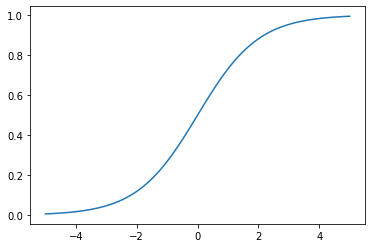

In [2]:
x=np.linspace(-5,5,100)
y=1/(1+np.exp(-x))
sns.lineplot(x,y)

# Q2.利用pandas的to_datetime和Timedelta，找出1900年的2月28是星期幾，還有隔天的日期
如果有興趣可以去Excely再試一次看看 會有[意外的發現](https://docs.microsoft.com/zh-tw/office/troubleshoot/excel/wrongly-assumes-1900-is-leap-year)

In [3]:
ans=pd.to_datetime('2/28/1900')
ans.day_name()

'Wednesday'

In [4]:
further_day = ans+pd.Timedelta('1d')
further_day

Timestamp('1900-03-01 00:00:00')

# Covid-19資料集
資料來源 : Johns Hopkins Coronavirus Resource Center

資料下載地點 : https://github.com/CSSEGISandData/COVID-19

下載步驟 : 
 - 進入archived_data資料夾
 - 進入archived_time_series資料夾
 - 下載並匯入以下三個資料集

  1. time_series_19-covid-Confirmed_archived_0325.csv
  2. time_series_19-covid-Deaths_archived_0325.csv
  3. time_series_19-covid-Recovered_archived_0325.csv

- 可以選擇將檔案下載下來匯入；或是到檔案頁面，按下raw取得線上網址，直接用read_csv讀取

  (檔案可能會在作業過程中更新，抓最新的資料即可)

# Q3. 讀取Confirmed資料集，並顯示出來

In [5]:
confirmed=pd.read_csv("time_series_19-covid-Confirmed_archived_0325.csv",sep=",")
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0


# Q4. 將Confirmed資料集去除經緯度並轉換結構如下

hint: df.melt()

In [6]:
confirmed.drop(["Lat","Long"],axis=1,inplace=True)

In [7]:
temp=pd.melt(confirmed,id_vars=["Country/Region","Province/State"],value_vars=confirmed.columns[2:])
temp["Date"]=temp["variable"].apply(lambda x:pd.to_datetime(x, format = '%m/%d/%y'))
temp.drop("variable",axis=1,inplace=True)
temp.rename(columns={"value": "Total_Confirmed"},inplace=True)
temp=temp.set_index("Date")
temp

,Country/Region,Province/State,Total_Confirmed
Date,,,
2020-01-22,Thailand,NaN,2.0
2020-01-22,Japan,NaN,2.0
2020-01-22,Singapore,NaN,0.0
2020-01-22,Nepal,NaN,0.0
2020-01-22,Malaysia,NaN,0.0
...,...,...,...
2020-03-23,Jersey,NaN,0.0
2020-03-23,Puerto Rico,NaN,0.0
2020-03-23,Republic of the Congo,NaN,0.0


# Q5. 將國家(Country/Region)的每日各省分人數資料加總，並消除省級欄位(Province/State)

In [8]:
Q5=pd.DataFrame(temp.groupby(["Date","Country/Region"])["Total_Confirmed"].sum())
Q5=Q5.reset_index().set_index("Date")
Q5=Q5.sort_values("Country/Region")
Q5

,Country/Region,Total_Confirmed
Date,,
2020-01-22,Afghanistan,0.0
2020-03-14,Afghanistan,11.0
2020-02-10,Afghanistan,0.0
2020-02-09,Afghanistan,0.0
2020-03-15,Afghanistan,16.0
...,...,...
2020-02-25,Zimbabwe,0.0
2020-02-24,Zimbabwe,0.0
2020-02-23,Zimbabwe,0.0


# Q6. 請列出出在2020/02/21日，累積確診人數最高的十個國家和確診人數

In [9]:
someday=pd.Timestamp('2020-03-21')
Q6=temp[temp.index==pd.Timestamp('2020-03-21')]
Q6=pd.DataFrame(Q6.groupby("Country/Region")["Total_Confirmed"].sum())
Q6=Q6.sort_values("Total_Confirmed",ascending=False)[:10]
Q6.rename(columns={"Total_Confirmed":"2020/03/21確診人數"})
Q6

,Total_Confirmed
Country/Region,
China,81305.0
Italy,53578.0
US,25489.0
Spain,25374.0
Germany,22213.0
Iran,20610.0
France,14431.0
"Korea, South",8799.0
Switzerland,6575.0


# Q7. 將前10個國家單獨拉出，並且形成新的dataframe
( hint: df.isin( list ) )

In [10]:
Q7=temp[temp["Country/Region"].isin(Q6.index)]
Q7=Q7.reset_index()
Q7=Q7.groupby(["Date","Country/Region"])["Total_Confirmed"].sum()
Q7=pd.DataFrame(Q7)
Q7=Q7.sort_values("Country/Region")
Q7

,,Total_Confirmed
Date,Country/Region,
2020-01-22,China,548.0
2020-01-29,China,6087.0
2020-03-21,China,81305.0
2020-02-19,China,74619.0
2020-02-20,China,75077.0
...,...,...
2020-02-22,United Kingdom,9.0
2020-02-20,United Kingdom,9.0
2020-02-19,United Kingdom,9.0


# Q8. 畫出前十個國家的確診人數折線圖

C:\Users\POPO\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


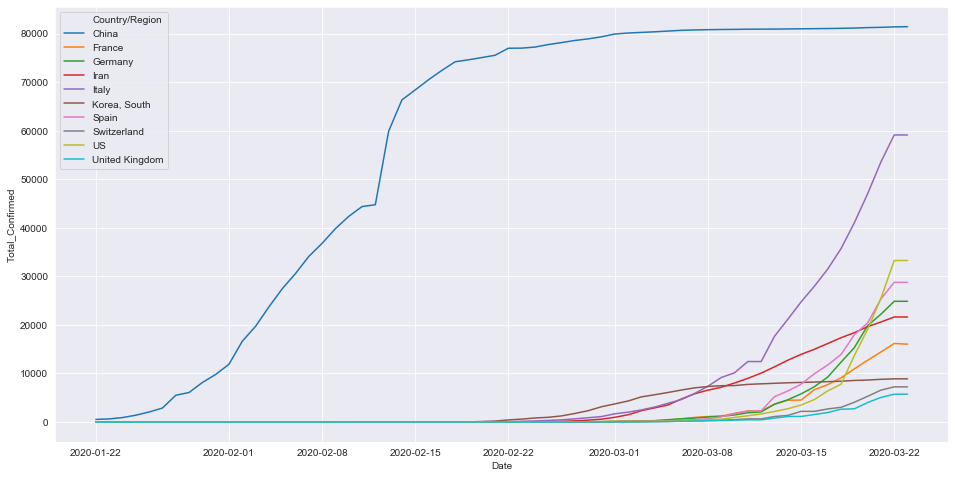

In [11]:
fig = plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
Q7=Q7.reset_index()
sns.lineplot(x=Q7.Date, y = 'Total_Confirmed',hue="Country/Region", data=Q7)

# Q9. 引入Recovered人數資料集，並重複上面Q3~Q5的整理過程

In [12]:
recovered=pd.read_csv("time_series_19-covid-Recovered_archived_0325.csv",sep=",")
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,35,35,35,41,42,42,42,42,44,44.0
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,118,118,144,144,144,150,191,232,235,235.0
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,105,105,109,114,114,114,124,140,144,144.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,35,42,42,49,60,75,87,114,139,139.0


In [13]:
recovered.drop(["Lat","Long"],axis=1,inplace=True)
temp=pd.melt(recovered,id_vars=["Country/Region","Province/State"],value_vars=recovered.columns[2:])
temp["Date"]=temp["variable"].apply(lambda x:pd.to_datetime(x, format = '%m/%d/%y'))
temp.drop("variable",axis=1,inplace=True)
temp.rename(columns={"value": "Total_Recoverd"},inplace=True)
temp=temp.set_index("Date")
temp

,Country/Region,Province/State,Total_Recoverd
Date,,,
2020-01-22,Thailand,NaN,0.0
2020-01-22,Japan,NaN,0.0
2020-01-22,Singapore,NaN,0.0
2020-01-22,Nepal,NaN,0.0
2020-01-22,Malaysia,NaN,0.0
...,...,...,...
2020-03-23,Jersey,NaN,0.0
2020-03-23,Puerto Rico,NaN,0.0
2020-03-23,Republic of the Congo,NaN,0.0


In [14]:
Q9=pd.DataFrame(temp.groupby(["Date","Country/Region"])["Total_Recoverd"].sum())
Q9=Q9.reset_index().set_index("Date")
Q9=Q9.sort_values("Country/Region")
Q9

,Country/Region,Total_Recoverd
Date,,
2020-01-22,Afghanistan,0.0
2020-03-14,Afghanistan,0.0
2020-02-10,Afghanistan,0.0
2020-02-09,Afghanistan,0.0
2020-03-15,Afghanistan,0.0
...,...,...
2020-02-25,Zimbabwe,0.0
2020-02-24,Zimbabwe,0.0
2020-02-23,Zimbabwe,0.0


# Q10. 找出在2020/03/22日時，康復人數最高的前20個國家，用垂直長條圖畫出來

In [15]:
someday=pd.Timestamp('2020-03-22')
Q10=Q9[Q9.index==someday]
Q10=Q10.sort_values("Total_Recoverd",ascending=False)[:20]
Q10

,Country/Region,Total_Recoverd
Date,,
2020-03-22,China,72362.0
2020-03-22,Iran,7931.0
2020-03-22,Italy,7024.0
2020-03-22,"Korea, South",2909.0
2020-03-22,Spain,2575.0
2020-03-22,France,2206.0
2020-03-22,Cruise Ship,325.0
2020-03-22,Germany,266.0
2020-03-22,Belgium,263.0


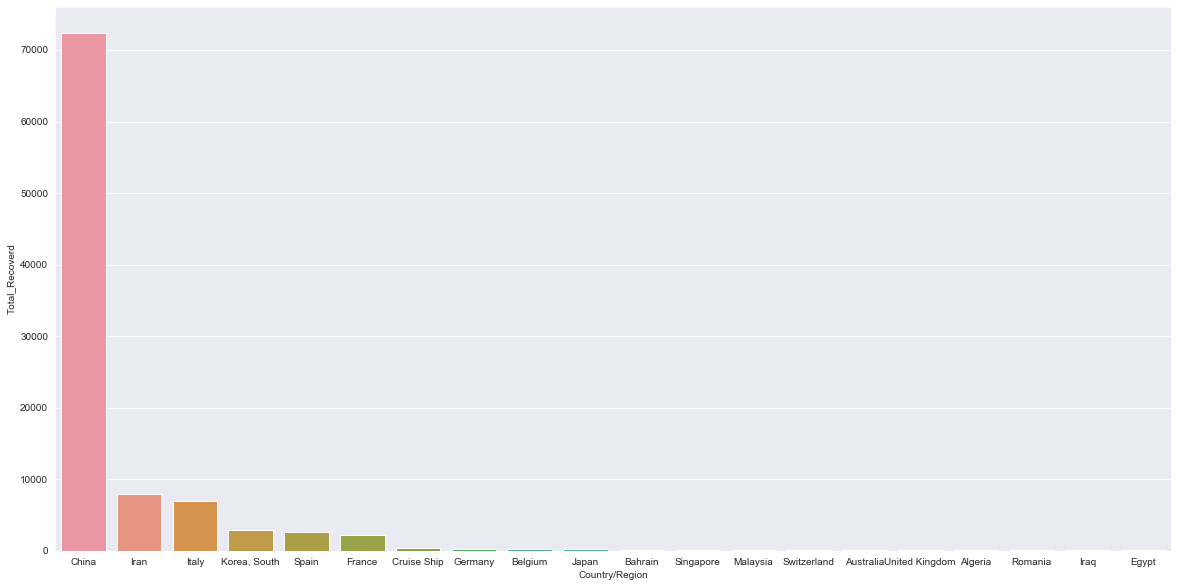

In [16]:
fig = plt.figure(figsize=(20,10))
sns.barplot(x = Q10["Country/Region"] , y = Q10["Total_Recoverd"])

# Q11. 引入Deaths人數，並重複上面Q3~Q5的整理過程

In [17]:
Deaths=pd.read_csv("time_series_19-covid-Deaths_archived_0325.csv",sep=",")
Deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,22,22,27,29,29,29,33,35,40,40.0
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,2,2,2,3,4,10,10.0


In [18]:
Deaths.drop(["Lat","Long"],axis=1,inplace=True)
temp=pd.melt(Deaths,id_vars=["Country/Region","Province/State"],value_vars=Deaths.columns[2:])
temp["Date"]=temp["variable"].apply(lambda x:pd.to_datetime(x, format = '%m/%d/%y'))
temp.drop("variable",axis=1,inplace=True)
temp.rename(columns={"value": "Total_Deaths"},inplace=True)
temp=temp.set_index("Date")
temp

,Country/Region,Province/State,Total_Deaths
Date,,,
2020-01-22,Thailand,NaN,0.0
2020-01-22,Japan,NaN,0.0
2020-01-22,Singapore,NaN,0.0
2020-01-22,Nepal,NaN,0.0
2020-01-22,Malaysia,NaN,0.0
...,...,...,...
2020-03-23,Jersey,NaN,0.0
2020-03-23,Puerto Rico,NaN,1.0
2020-03-23,Republic of the Congo,NaN,0.0


In [19]:
Q11=pd.DataFrame(temp.groupby(["Date","Country/Region"])["Total_Deaths"].sum())
Q11=Q11.reset_index().set_index("Date")
Q11=Q11.sort_values("Country/Region")
Q11

,Country/Region,Total_Deaths
Date,,
2020-01-22,Afghanistan,0.0
2020-03-14,Afghanistan,0.0
2020-02-10,Afghanistan,0.0
2020-02-09,Afghanistan,0.0
2020-03-15,Afghanistan,0.0
...,...,...
2020-02-25,Zimbabwe,0.0
2020-02-24,Zimbabwe,0.0
2020-02-23,Zimbabwe,0.0


# Q12. 找出在2020/03/22日時，死亡人數最高的前20個國家，用水平長條圖畫出來

In [20]:
someday=pd.Timestamp('2020-03-22')
Q12=Q11[Q11.index==someday]
Q12=Q12.sort_values("Total_Deaths",ascending=False)[:20]
Q12

,Country/Region,Total_Deaths
Date,,
2020-03-22,Italy,5476.0
2020-03-22,China,3265.0
2020-03-22,Spain,1772.0
2020-03-22,Iran,1685.0
2020-03-22,France,674.0
2020-03-22,US,417.0
2020-03-22,United Kingdom,282.0
2020-03-22,Netherlands,180.0
2020-03-22,"Korea, South",104.0


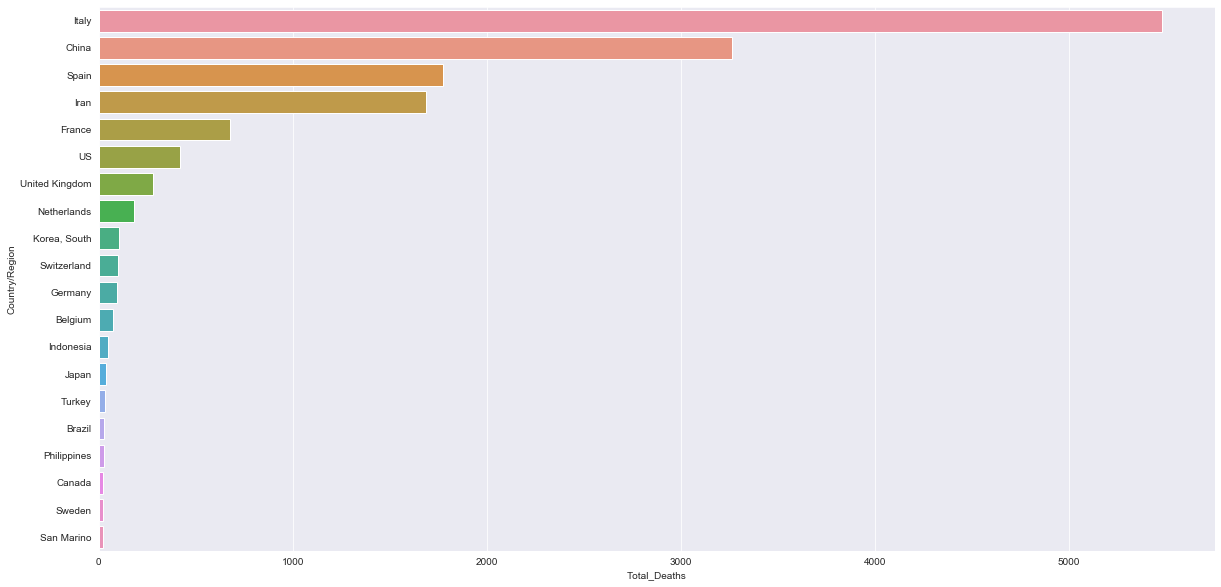

In [21]:
fig = plt.figure(figsize=(20,10))
sns.barplot(y = Q12["Country/Region"] , x = Q12["Total_Deaths"])

# 做到這裡就可以拿完整分數了，後面是自由練習和補充一個pandas函數－merge

### pandas.merge

針對特定的key把資料拼在一起，可以用多個key來比對，但是一次只能合併兩張報表

以下分別是三張報表

In [22]:
Total_Comfirmed_Data=Q5
Total_Comfirmed_Data.head()

,Country/Region,Total_Confirmed
Date,,
2020-01-22,Afghanistan,0.0
2020-03-14,Afghanistan,11.0
2020-02-10,Afghanistan,0.0
2020-02-09,Afghanistan,0.0
2020-03-15,Afghanistan,16.0


In [23]:
Total_Recoverd_Data=Q9
Total_Recoverd_Data.head()

,Country/Region,Total_Recoverd
Date,,
2020-01-22,Afghanistan,0.0
2020-03-14,Afghanistan,0.0
2020-02-10,Afghanistan,0.0
2020-02-09,Afghanistan,0.0
2020-03-15,Afghanistan,0.0


In [24]:
Total_Deaths_Data=Q11
Total_Deaths_Data.tail()

,Country/Region,Total_Deaths
Date,,
2020-02-25,Zimbabwe,0.0
2020-02-24,Zimbabwe,0.0
2020-02-23,Zimbabwe,0.0
2020-02-20,Zimbabwe,0.0
2020-03-23,Zimbabwe,0.0


合併

In [25]:
combine_data = pd.merge(Total_Comfirmed_Data, Total_Recoverd_Data, how='left', on=['Country/Region', 'Date'])  #根據Date以及Country，確認兩者都相符之後，才會把Total_Recoverd_Data的資料合併在右邊，並且存成新的變數"combine_data"
combine_data.head()

,Country/Region,Total_Confirmed,Total_Recoverd
Date,,,
2020-01-22,Afghanistan,0.0,0.0
2020-03-14,Afghanistan,11.0,0.0
2020-02-10,Afghanistan,0.0,0.0
2020-02-09,Afghanistan,0.0,0.0
2020-03-15,Afghanistan,16.0,0.0


In [26]:
combine_data = pd.merge(combine_data, Total_Deaths_Data, how='left', on=['Country/Region', 'Date'])  #將combine_data再度和Total_Deaths_Data合併
combine_data.head()

,Country/Region,Total_Confirmed,Total_Recoverd,Total_Deaths
Date,,,,
2020-01-22,Afghanistan,0.0,0.0,0.0
2020-03-14,Afghanistan,11.0,0.0,0.0
2020-02-10,Afghanistan,0.0,0.0,0.0
2020-02-09,Afghanistan,0.0,0.0,0.0
2020-03-15,Afghanistan,16.0,0.0,0.0


檢查2020/03/22的時間斷面

In [27]:
combine_data['2020/03/20']

,Country/Region,Total_Confirmed,Total_Recoverd,Total_Deaths
Date,,,,
2020-03-20,Afghanistan,24.0,1.0,0.0
2020-03-20,Albania,70.0,0.0,2.0
2020-03-20,Algeria,90.0,32.0,11.0
2020-03-20,Andorra,75.0,1.0,0.0
2020-03-20,Angola,1.0,0.0,0.0
...,...,...,...,...
2020-03-20,Uzbekistan,33.0,0.0,0.0
2020-03-20,Venezuela,42.0,0.0,0.0
2020-03-20,Vietnam,91.0,16.0,0.0


In [28]:
#按照確診規模排序
combine_data['2020/03/20'].sort_values('Total_Confirmed', ascending=False)

,Country/Region,Total_Confirmed,Total_Recoverd,Total_Deaths
Date,,,,
2020-03-20,China,81250.0,71266.0,3253.0
2020-03-20,Italy,47021.0,4440.0,4032.0
2020-03-20,Spain,20410.0,1588.0,1043.0
2020-03-20,Germany,19848.0,180.0,67.0
2020-03-20,Iran,19644.0,6745.0,1433.0
...,...,...,...,...
2020-03-20,Reunion,0.0,0.0,0.0
2020-03-20,Syria,0.0,0.0,0.0
2020-03-20,Guam,0.0,0.0,0.0


## 增加新的指標

In [29]:
combine_data['Cure_Rate'] = combine_data['Total_Recoverd'] / combine_data['Total_Confirmed']
combine_data['Death_Rate'] = combine_data['Total_Deaths'] / combine_data['Total_Confirmed']
combine_data['Cure-Death Ratio'] = combine_data['Total_Recoverd'] / combine_data['Total_Deaths']

In [30]:
combine_data.head()

,Country/Region,Total_Confirmed,Total_Recoverd,Total_Deaths,Cure_Rate,Death_Rate,Cure-Death Ratio
Date,,,,,,,
2020-01-22,Afghanistan,0.0,0.0,0.0,NaN,NaN,NaN
2020-03-14,Afghanistan,11.0,0.0,0.0,0.0,0.0,NaN
2020-02-10,Afghanistan,0.0,0.0,0.0,NaN,NaN,NaN
2020-02-09,Afghanistan,0.0,0.0,0.0,NaN,NaN,NaN
2020-03-15,Afghanistan,16.0,0.0,0.0,0.0,0.0,NaN


In [31]:
combine_data = combine_data.fillna(0)
combine_data.head()

,Country/Region,Total_Confirmed,Total_Recoverd,Total_Deaths,Cure_Rate,Death_Rate,Cure-Death Ratio
Date,,,,,,,
2020-01-22,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-14,Afghanistan,11.0,0.0,0.0,0.0,0.0,0.0
2020-02-10,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-09,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-15,Afghanistan,16.0,0.0,0.0,0.0,0.0,0.0


# 找2020/03/22日，前10個確診人數規模最大的國家來做圖

In [32]:
top_10=combine_data['2020/03/22'].sort_values('Total_Confirmed', ascending=False)[:10]["Country/Region"]
top_10.values

array(['China', 'Italy', 'US', 'Spain', 'Germany', 'Iran', 'France',
       'Korea, South', 'Switzerland', 'United Kingdom'], dtype=object)

In [33]:
ans=combine_data[combine_data["Country/Region"].isin(top_10.values)]
ans=ans.reset_index()
ans=ans.sort_values(["Date","Country/Region"])
ans.head()

,Date,Country/Region,Total_Confirmed,Total_Recoverd,Total_Deaths,Cure_Rate,Death_Rate,Cure-Death Ratio
16,2020-01-22,China,548.0,28.0,17.0,0.051095,0.031022,1.647059
100,2020-01-22,France,0.0,0.0,0.0,0.000000,0.000000,0.000000
161,2020-01-22,Germany,0.0,0.0,0.0,0.000000,0.000000,0.000000
219,2020-01-22,Iran,0.0,0.0,0.0,0.000000,0.000000,0.000000
267,2020-01-22,Italy,0.0,0.0,0.0,0.000000,0.000000,0.000000


## 批量作圖

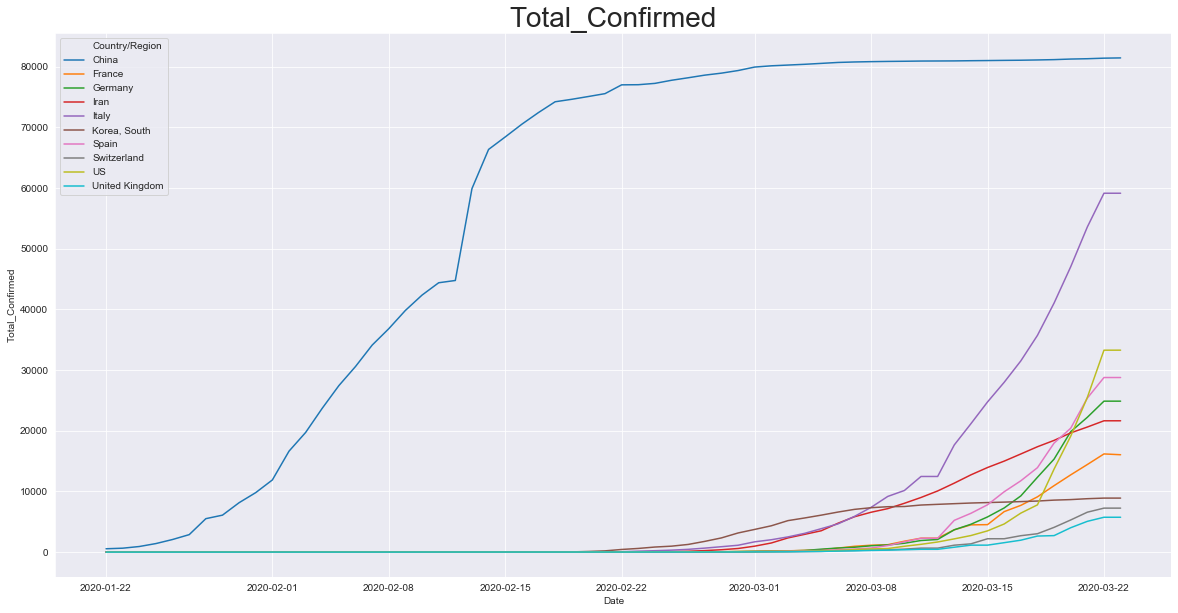

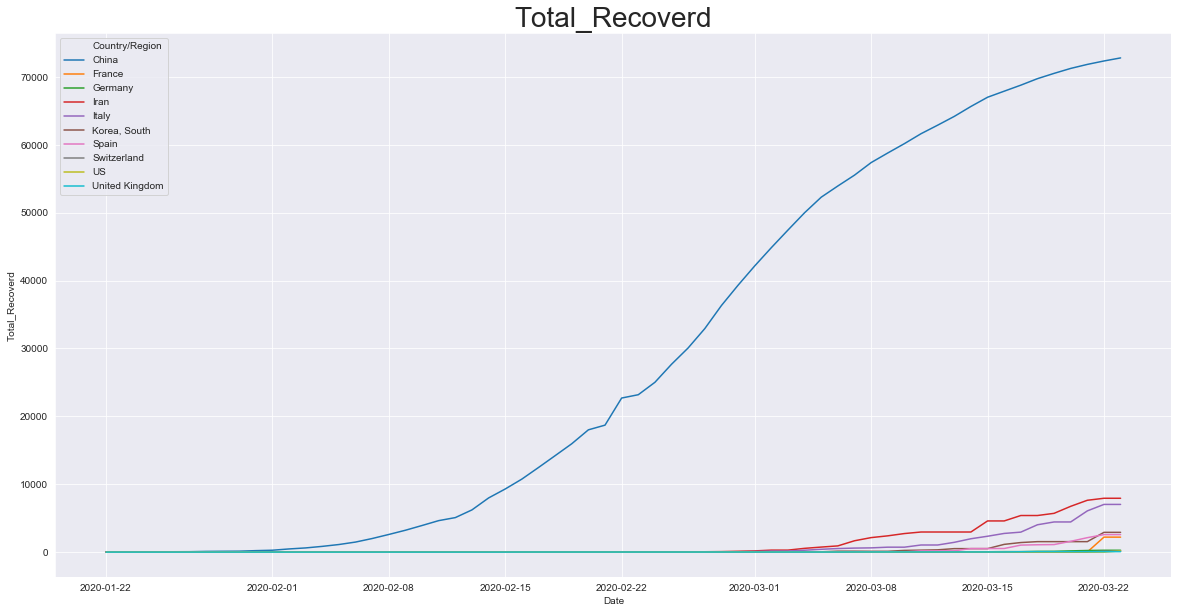

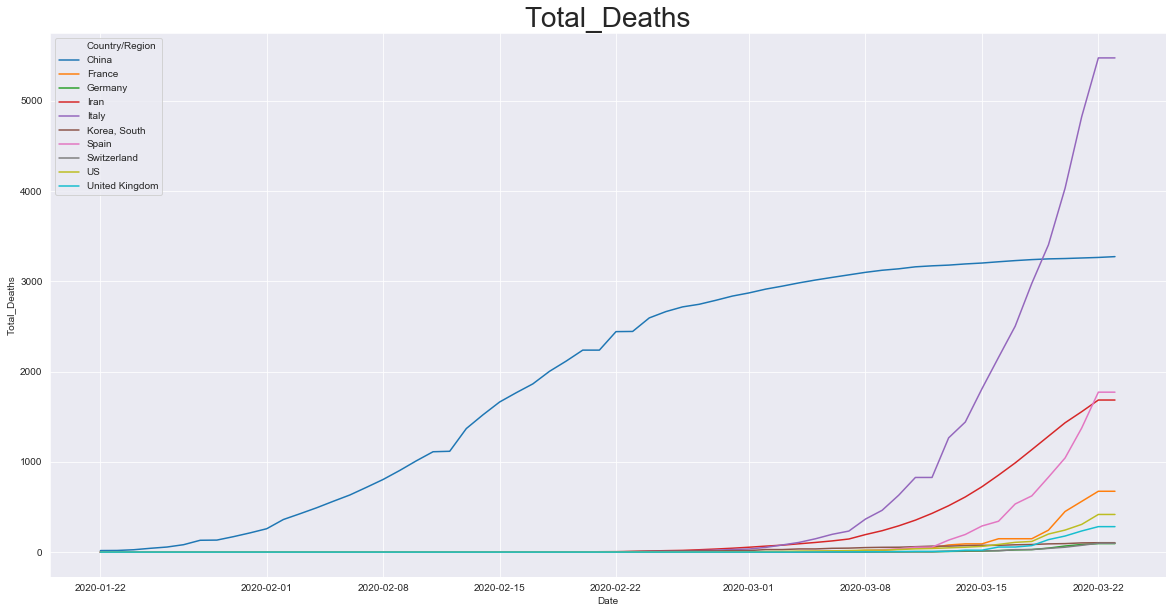

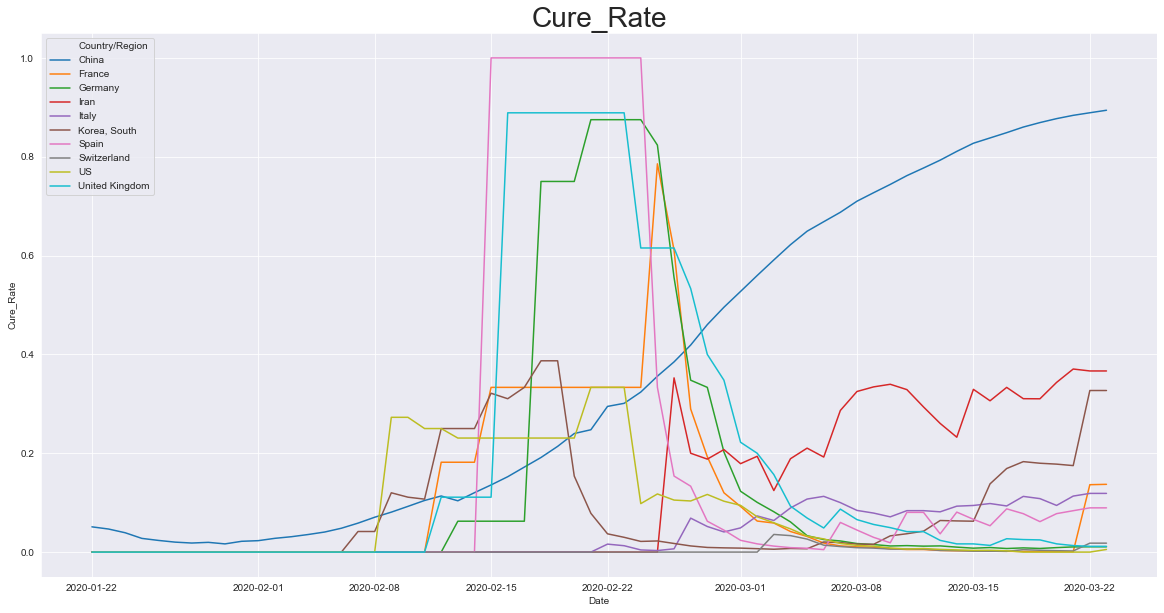

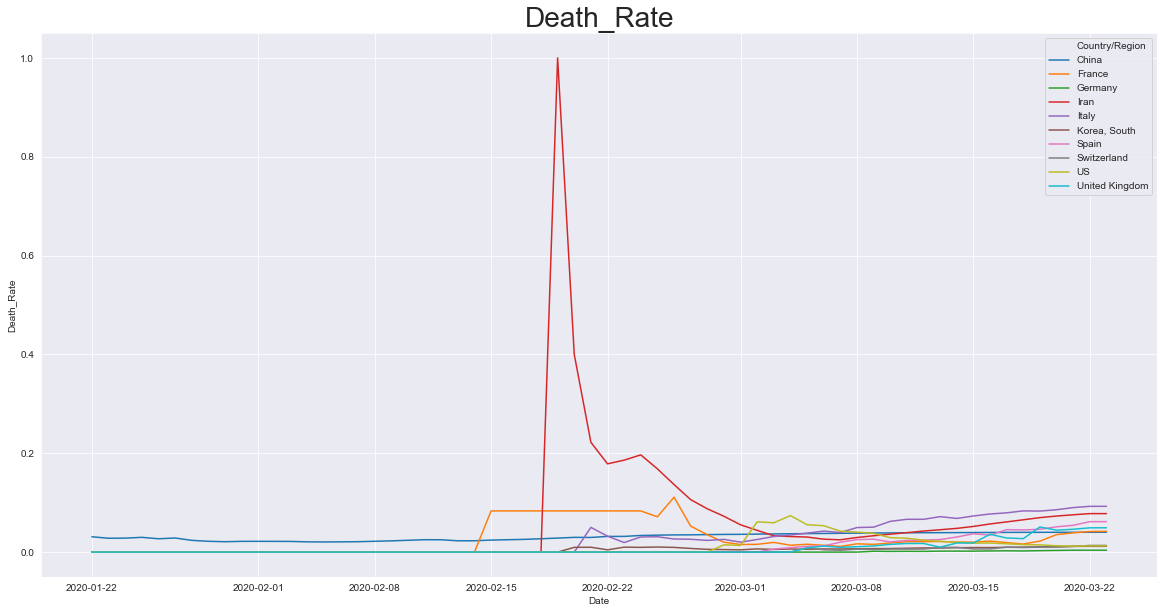

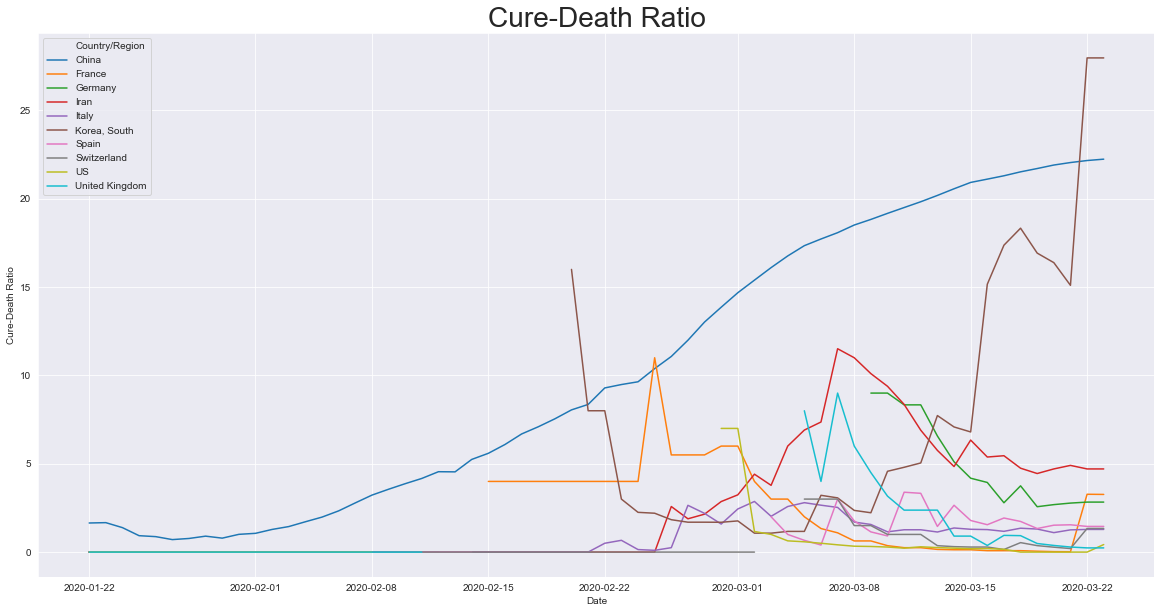

In [34]:
for i in ans.columns[2:]:
    fig = plt.figure(figsize=(20,10))
    plt.title(i, fontsize=28)
    sns.lineplot(x=ans.Date, y = i,hue="Country/Region", data=ans)